In [1]:
import scanpy as sc
import torch
from deepmap import DeepMap
import warnings

In [2]:
torch.cuda.set_device(1)

In [3]:
warnings.filterwarnings('ignore')

In [4]:
adata = sc.read_h5ad('../datasets/preprocessed/TM_Thymus.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 2778 × 23341
    obs: 'celltype', 'batch'

In [6]:
adata.obs

,celltype,batch
H6.MAA000607.3_9_M.1.1,immature T cell,SS2
I8.MAA000607.3_9_M.1.1,immature T cell,SS2
J10.MAA000607.3_9_M.1.1,immature T cell,SS2
K12.MAA000607.3_9_M.1.1,immature T cell,SS2
A17.MAA000607.3_9_M.1.1,immature T cell,SS2
...,...,...
10X_P7_11_TTTGCGCGTTAAAGAC,immature T cell,10X
10X_P7_11_TTTGGTTCACCAGCAC,immature T cell,10X
10X_P7_11_TTTGGTTTCCGAACGC,DN1 thymic pro-T cell,10X
10X_P7_11_TTTGGTTTCCTAGGGC,immature T cell,10X


In [7]:
batch_key = 'batch'

model = DeepMap(k = 10, mnn_only = True)
model.preprocess(adata, batch_key, gene_num = 4000)
model.integrate(n_iters = 2000, beta = 0.1)

Thu Jun  8 13:54:09 2023 Data normalization ...
Thu Jun  8 13:54:10 2023 Finding highly variable genes ...
Thu Jun  8 13:54:11 2023 Found 1523 highly variable genes
Thu Jun  8 13:54:11 2023 Saving unscaled data ...
Thu Jun  8 13:54:11 2023 Data Scaling ...
Thu Jun  8 13:54:11 2023 Performing PCA ...
Thu Jun  8 13:54:11 2023 Start integrating ...
Thu Jun  8 13:54:11 2023 GPU used.
Thu Jun  8 13:54:11 2023 Finding neighbors ...
Thu Jun  8 13:54:11 2023 Initial neighbor search completed, time used: 0.2 second.
Thu Jun  8 13:54:42 2023 Reconstructing neighbors 1/5 ...
Thu Jun  8 13:54:48 2023 Reconstructing neighbors 2/5 ...
Thu Jun  8 13:54:54 2023 Reconstructing neighbors 3/5 ...
Thu Jun  8 13:55:00 2023 Reconstructing neighbors 4/5 ...
Thu Jun  8 13:55:06 2023 Reconstructing neighbors 5/5 ...
Thu Jun  8 13:55:12 2023 Integration finished.


In [8]:
model.integrated

View of AnnData object with n_obs × n_vars = 2778 × 20
    obs: 'celltype', 'batch'

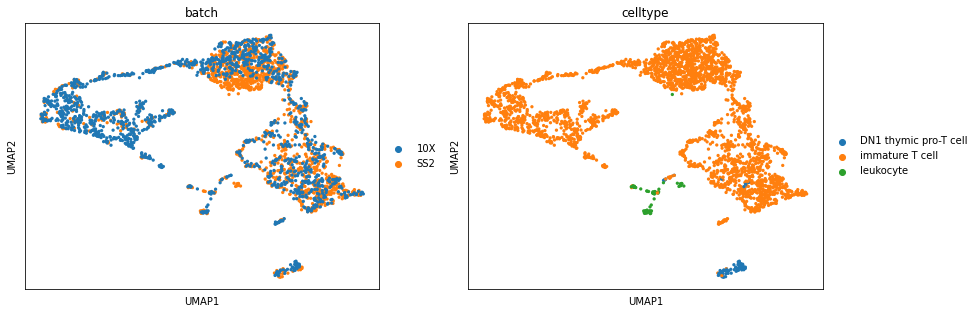

In [9]:
sc.pp.neighbors(model.integrated)
sc.tl.umap(model.integrated)
sc.pl.umap(model.integrated, color = ['batch', 'celltype'])